# Classification

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

In [2]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!





In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

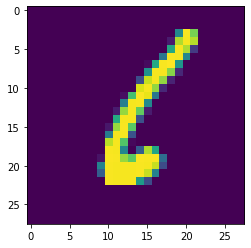

In [4]:
for data in trainset:
    data = data


plt.imshow(data[0][0].view(28,28))
plt.show()

## Data Balance Check

In [5]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {int(counter_dict[i]/total*100)}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9%
1: 11%
2: 9%
3: 10%
4: 9%
5: 9%
6: 9%
7: 10%
8: 9%
9: 9%


In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fully_connected_1 = nn.Linear(28 * 28, 64) # Input: 28*28 Flatten Image, Output: random number for output of Hidden Layer
        self.fully_connected_2 = nn.Linear(64, 64)
        self.fully_connected_3 = nn.Linear(64, 64)
        self.fully_connected_4 = nn.Linear(64, 10) # output 10 as we have 10 different items to classify i.e 0-9
    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = F.relu(self.fully_connected_3(x))
        x = self.fully_connected_4(x)
        return F.softmax(x, dim=1)

net = Net()

In [0]:
random_image = torch.rand((28, 28))

output = net(random_image.view(-1, 28 * 28))

In [21]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data # X[0]: featureset Y[0]: labels
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(-0.9997, grad_fn=<NllLossBackward>)
tensor(-0.9000, grad_fn=<NllLossBackward>)
tensor(-1.0000, grad_fn=<NllLossBackward>)


In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.916


## Test

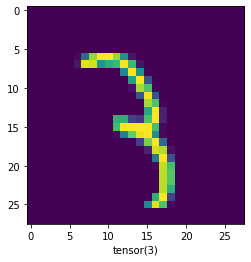

In [25]:
Nth_Result = 3

plt.imshow(X[Nth_Result].view(28, 28))
plt.xlabel(torch.argmax(net(X[Nth_Result].view(-1, 28 * 28))[0]))
plt.show()